# 1. Entendimiento del problema  
La extroversión y la introversión influyen en la interacción de las personas con su entorno social , se nos dan datos que nos dan informacion sobre las personas.
En el ejercicio se nos pide predecir los tipos de personalidad analizando los patrones sociales.
Crear un modelo predictivo tiene aplicaciones en la pscología, sociologia, marcketing y machine learning.


# 2. Enfoque analítico
Desarrollar un experimento de clasificación que permita identificar si la persona es extrovertida o introvertida con un nivel de desempeño superior al 75%

# 3.  Requerimiento de datos 
- Datos comportamentales: Time_Spent_Alone, Stage_Fear, Drained_After_Socializing

- Datos de hábitos sociales: Social_Event_Attendance, Going_Outside, Friends_Circle_Size

- Datos de interacción digital: Post_Frecuency

# 4. Entendimiento de datos 
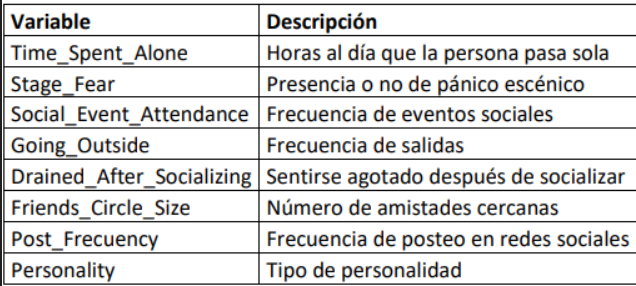

In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('datos_caso_9.csv')
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


# 5. Entendimiento de datos 

In [61]:
import matplotlib.pyplot as plt
import seaborn as sb

In [62]:
#Identificación de datos nulos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


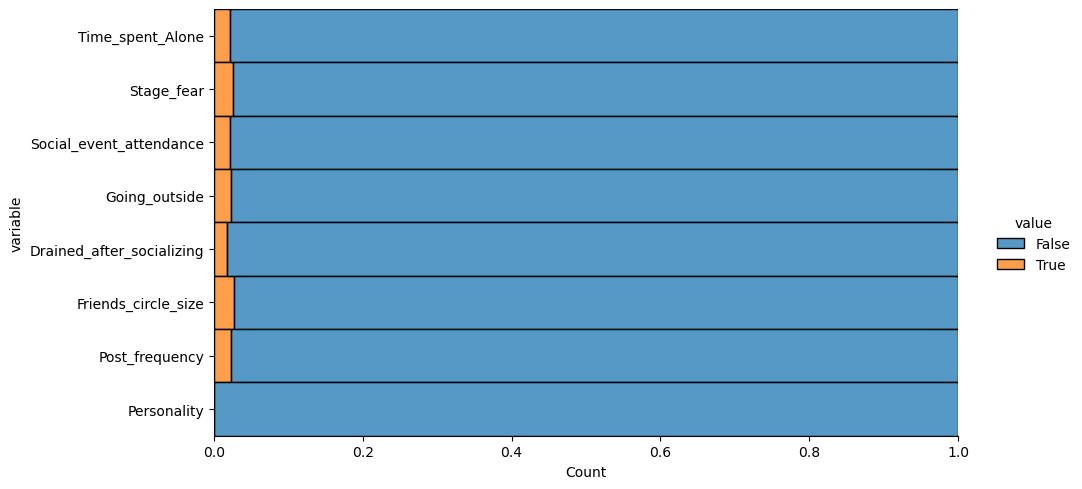

In [63]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()
#único sin nulos es personalidad 
#resto con proporcion menor al 5%

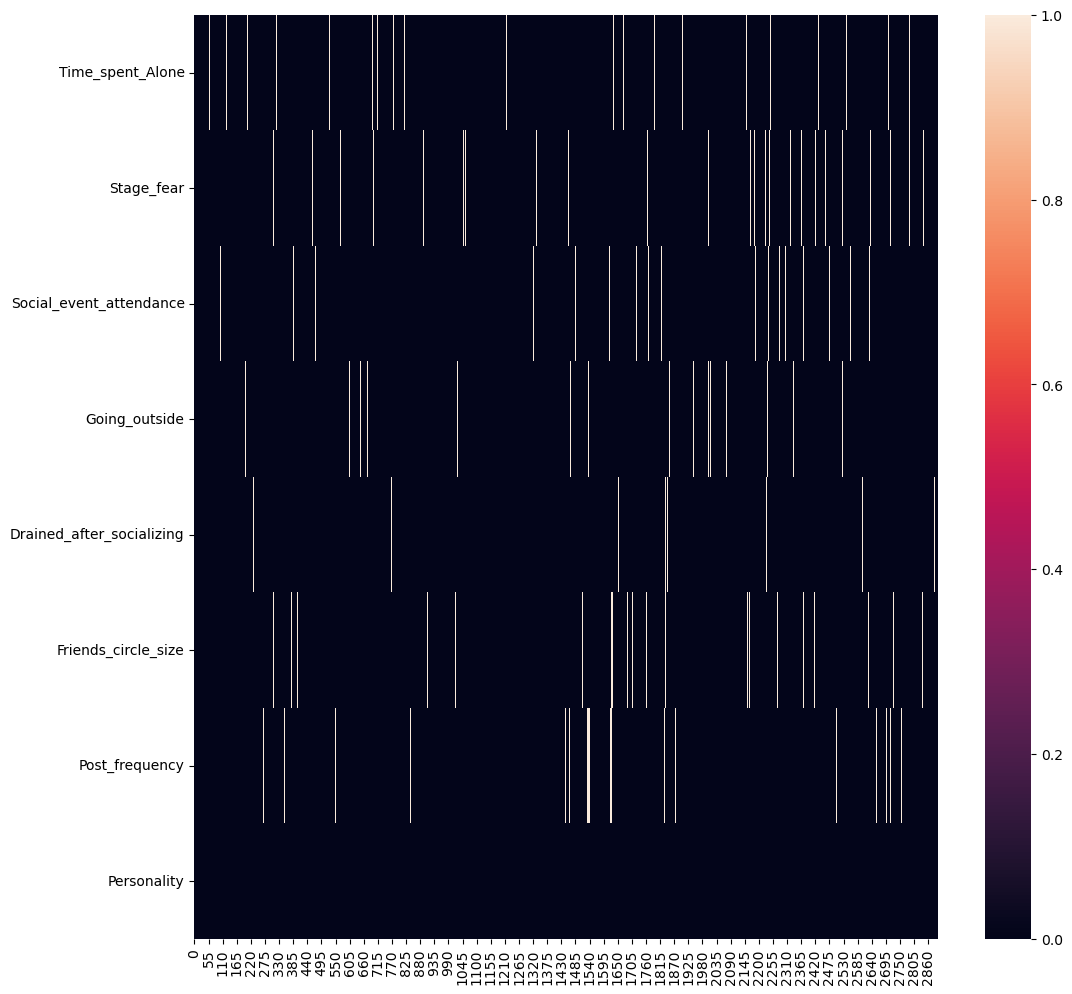

In [64]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()
#Distribución variada de los datos nulos

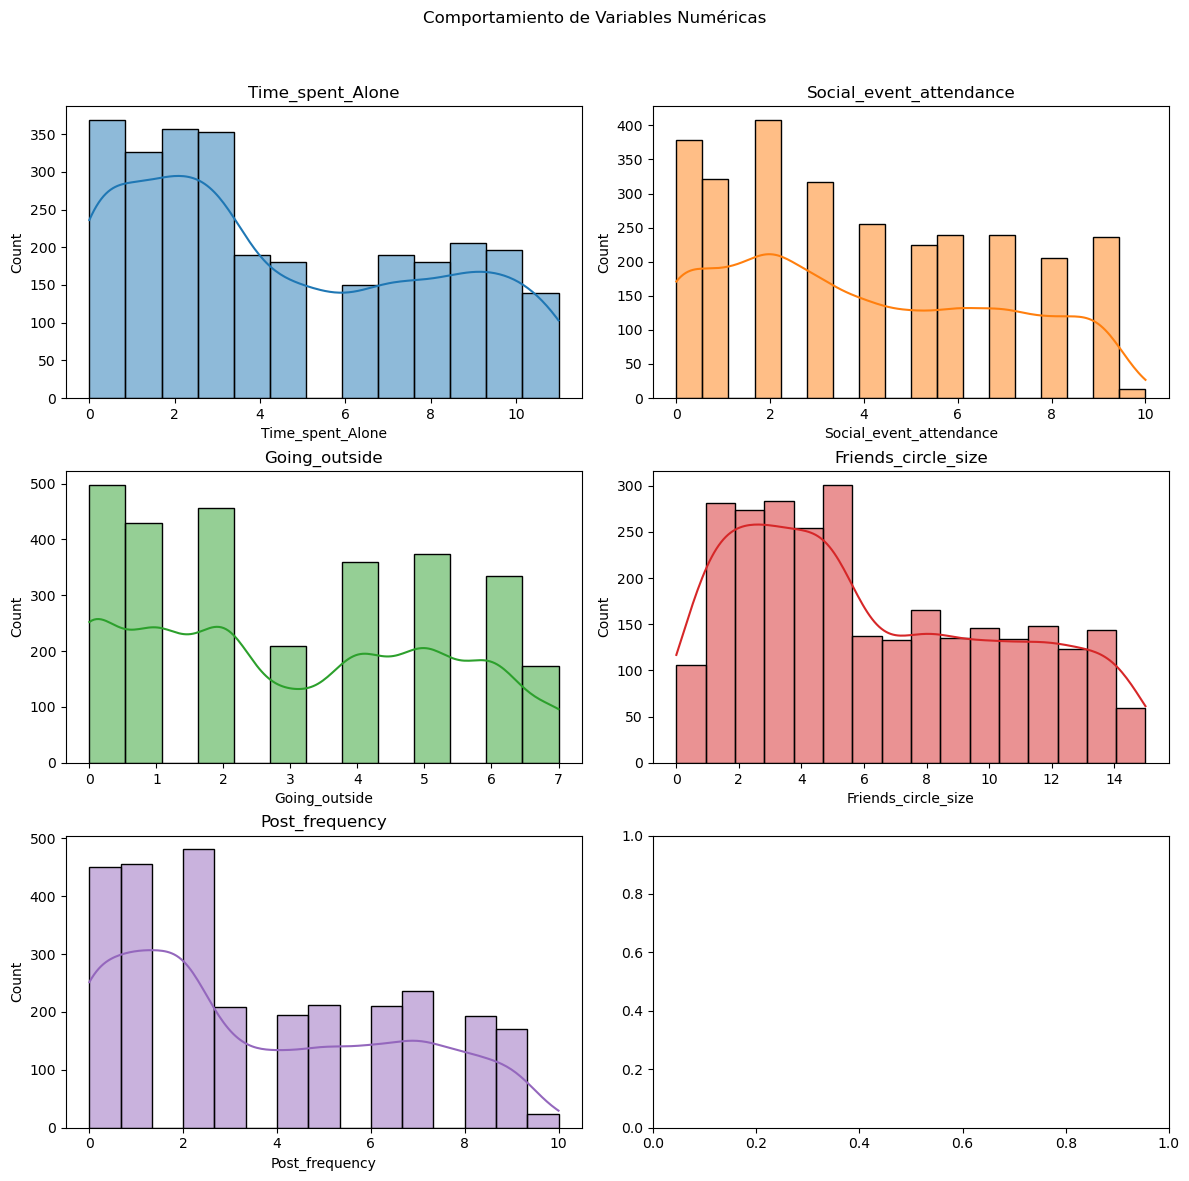

In [65]:
#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(3, 2, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()
#Interprtación: time spend alone es algo bimodal con 2 tipos diferentes de personas 
#social event attendance, friend circle size y post frecuancy son un poco sesgadas a la izquierda sobre todo friend circle size
#no hay ninguna uniforme 

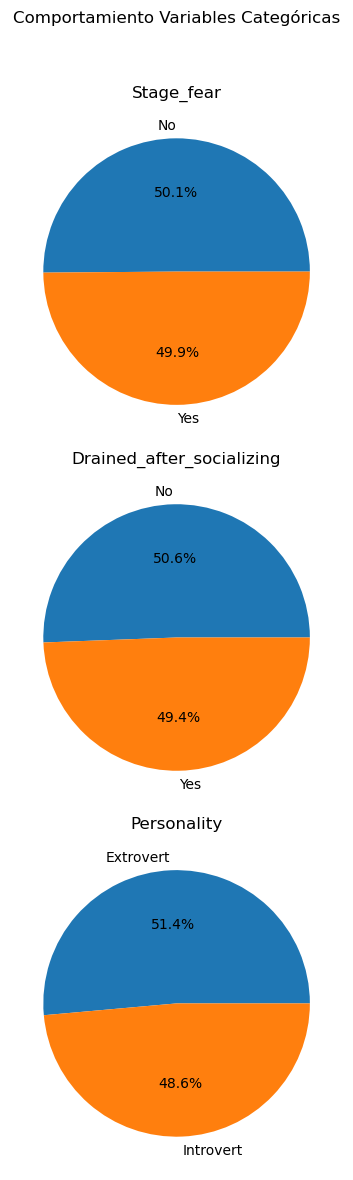

In [66]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(3, 1, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()
#Todas están muy parejas, no hay desbalances 


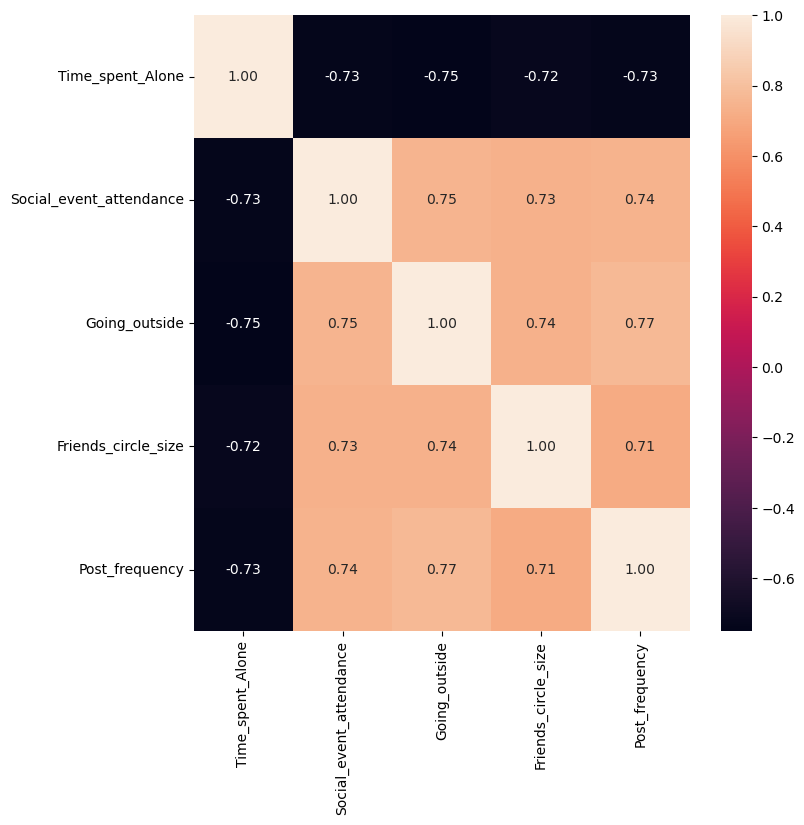

In [67]:
#factor de correlación para el análisis multivariado 
plt.figure(figsize=(8, 8))
sb.heatmap(data=data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()
#time spend alone  tiene una correlacion negativa fuerte con todas las variables 
#social event attendance con correlacion positiva fuete con going out y post frecuency 
#Going out muy correlacionada con post frecuency, practicamente duplicados , es necesario conservar solo uno 
# tieme spend alone es una variable opuesta al resto, puede ser el freature más diferenciador - Cluster individual

# 6. Preparación de los datos 

In [68]:
data_mod = data.drop('Going_outside', axis=1)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Drained_after_socializing  2848 non-null   object 
 4   Friends_circle_size        2823 non-null   float64
 5   Post_frequency             2835 non-null   float64
 6   Personality                2900 non-null   object 
dtypes: float64(4), object(3)
memory usage: 158.7+ KB


In [69]:
#Vamos a transformar variables categoricas en data set antes de entrenar el modelo 
import sklearn
categorical_cols = data_mod.select_dtypes(include = ['object']).columns
categorical_tranformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough') #aplica distintos preprocesos a las columnas especificas con parametros 
categorical_tranformer #Se conviertieron categoricos a enteros 

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object'))])

In [70]:

data_transformed = pd.DataFrame(categorical_tranformer.fit_transform(data_mod),
                                columns = categorical_tranformer.get_feature_names_out(),
                                index= data_mod.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns= lambda x: x.removeprefix('remainder__'))
 
data_transformed
#resultado : df con todas las columnes numericas y categoricas en formato numerico 
#tambien genera lista donde se tiene valor entre 0 y 1 para todas las columnas transformadas 

,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency
0,0.0,0.0,0.0,4.0,4.0,13.0,5.0
1,1.0,1.0,1.0,9.0,0.0,0.0,3.0
2,1.0,1.0,1.0,9.0,1.0,5.0,2.0
3,0.0,0.0,0.0,0.0,6.0,14.0,8.0
4,0.0,0.0,0.0,3.0,9.0,8.0,5.0
...,...,...,...,...,...,...,...
2895,0.0,0.0,0.0,3.0,7.0,6.0,6.0
2896,0.0,0.0,0.0,3.0,8.0,14.0,9.0
2897,1.0,1.0,1.0,4.0,1.0,4.0,0.0
2898,1.0,1.0,1.0,11.0,1.0,2.0,0.0


In [71]:
#Imputacion por vecindad 
#basado en k vecinos 
#busca 8 filas más cercanas en data (medido con distancia euclideana) y busca el promerdio de estos  vecinos para rellenar valores faltantes 
knn_imputer = sklearn.impute.KNNImputer(n_neighbors = 8)
data_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(), #reemplaza nann con valor imputado, el fit calcla estructura de vecinidad de datos 
                           columns= data_transformed.columns,
                           index= data_transformed.index)
data_knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Stage_fear                 2900 non-null   float64
 1   Drained_after_socializing  2900 non-null   float64
 2   Personality                2900 non-null   float64
 3   Time_spent_Alone           2900 non-null   float64
 4   Social_event_attendance    2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
dtypes: float64(7)
memory usage: 158.7 KB


In [72]:
#Imputacion recursiva
#trata cada columna con valores faltantes como variables objetivo . Iterativamente se ajusta a un modelo (bayesian ridge ) Se repite hasta estabilizar 
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression
recursive_imputer = sklearn.impute.IterativeImputer(estimator = LinearRegression(), #como modelo base para predecir . Random forest tmb sirve
                                                    initial_strategy = 'mean',#nann se rellena con media al principo 
                                                    max_iter = 9) # 9 predicciones en el proceso de prediccion y actualizacion 
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),
                                 columns= data_transformed.columns,
                                 index= data_transformed.index)
data_recursive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Stage_fear                 2900 non-null   float64
 1   Drained_after_socializing  2900 non-null   float64
 2   Personality                2900 non-null   float64
 3   Time_spent_Alone           2900 non-null   float64
 4   Social_event_attendance    2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
dtypes: float64(7)
memory usage: 158.7 KB


In [73]:
data_recursive_df #es el mejor

,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency
0,0.0,0.0,0.0,4.0,4.0,13.0,5.0
1,1.0,1.0,1.0,9.0,0.0,0.0,3.0
2,1.0,1.0,1.0,9.0,1.0,5.0,2.0
3,0.0,0.0,0.0,0.0,6.0,14.0,8.0
4,0.0,0.0,0.0,3.0,9.0,8.0,5.0
...,...,...,...,...,...,...,...
2895,0.0,0.0,0.0,3.0,7.0,6.0,6.0
2896,0.0,0.0,0.0,3.0,8.0,14.0,9.0
2897,1.0,1.0,1.0,4.0,1.0,4.0,0.0
2898,1.0,1.0,1.0,11.0,1.0,2.0,0.0


In [74]:
data_imputed = data_recursive_df.copy()
data_imputed[categorical_cols] = (categorical_tranformer.named_transformers_.ordinalencoder.inverse_transform(X= data_recursive_df[categorical_cols]))
data_imputed
#Se reemplaza por versiones originales legibles 

,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency
0,No,No,Extrovert,4.0,4.0,13.0,5.0
1,Yes,Yes,Introvert,9.0,0.0,0.0,3.0
2,Yes,Yes,Introvert,9.0,1.0,5.0,2.0
3,No,No,Extrovert,0.0,6.0,14.0,8.0
4,No,No,Extrovert,3.0,9.0,8.0,5.0
...,...,...,...,...,...,...,...
2895,No,No,Extrovert,3.0,7.0,6.0,6.0
2896,No,No,Extrovert,3.0,8.0,14.0,9.0
2897,Yes,Yes,Introvert,4.0,1.0,4.0,0.0
2898,Yes,Yes,Introvert,11.0,1.0,2.0,0.0


In [75]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Stage_fear                 2900 non-null   object 
 1   Drained_after_socializing  2900 non-null   object 
 2   Personality                2900 non-null   object 
 3   Time_spent_Alone           2900 non-null   float64
 4   Social_event_attendance    2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
dtypes: float64(4), object(3)
memory usage: 158.7+ KB


In [76]:
data_extrovert = data_imputed[data_imputed['Personality'] == 'Extrovert']
data_introvert = data_imputed[data_imputed['Personality'] == 'Introvert']


print(f'El tamaño de la clase Extrovert es: {data_extrovert.shape}\n El tamaño de la clase Introvert es: {data_introvert.shape}')

El tamaño de la clase Extrovert es: (1491, 7)
 El tamaño de la clase Introvert es: (1409, 7)


In [77]:
#separar x y y
#X contiene todas las var predictoras - freatures excepto personality
# y es la variable objetivo o target - que es personality (queremos predecirla )
X = data_imputed.drop(columns = ['Personality'], axis=1)
y = data_imputed[['Personality']]
print(f'El tamaño de X es: {X.shape} y el tamaño de y es: {y.shape}')
#se encuentra su tamaño 

El tamaño de X es: (2900, 6) y el tamaño de y es: (2900, 1)


In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

#transformar variables antes de entrar al modelo, en columnas numericas y categoricas  
num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X.select_dtypes(include = ['object']).columns.to_list() #modelos ml no procesan texto ent - numero escalar, normalizar 
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())]) # pipeline de valores en rango 0 a 1
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())]) #pipeline que convierte cat en vectores
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)], remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Time_spent_Alone', 'Social_event_attendance',
                                  'Friends_circle_size', 'Post_frequency']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Stage_fear', 'Drained_after_socializing'])])

In [79]:
# aplicar preprocesado 
X_pre = preprocessor.fit_transform(X) #todas las variables estan listas para procesos ml . Sparse matriz dispersa 
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])
X_pro = pd.DataFrame(X_pre, columns=labels)
X_pro.head(10)

,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.363636,0.4,0.866667,0.5,1.0,0.0,1.0,0.0
1,0.818182,0.0,0.000000,0.3,0.0,1.0,0.0,1.0
2,0.818182,0.1,0.333333,0.2,0.0,1.0,0.0,1.0
3,0.000000,0.6,0.933333,0.8,1.0,0.0,1.0,0.0
4,0.272727,0.9,0.533333,0.5,1.0,0.0,1.0,0.0
5,0.090909,0.7,0.400000,0.6,1.0,0.0,1.0,0.0
6,0.363636,0.9,0.466667,0.7,1.0,0.0,1.0,0.0
7,0.181818,0.8,0.466667,0.8,1.0,0.0,1.0,0.0
8,0.909091,0.1,0.000000,0.3,0.0,1.0,0.0,1.0
9,0.000000,0.8,0.866667,0.8,1.0,0.0,1.0,0.0


In [80]:
#separacion de train de test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.7, random_state=123)
print(f'El tamaño del conjunto de entrenamiento es {X_train.shape}{y_train.shape}\nEl tamaño de conjunto de validacion es: {X_test.shape}{y_test.shape}')

El tamaño del conjunto de entrenamiento es (2029, 8)(2029, 1)
El tamaño de conjunto de validacion es: (871, 8)(871, 1)


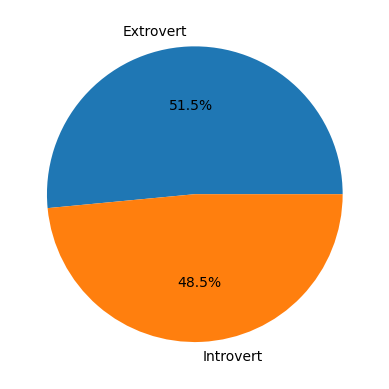

In [81]:
#visualizacion de balance de clases, el modelo está balanceado 
plt.pie(x = y_train.Personality.value_counts(), labels = y_train.Personality.value_counts().index, autopct = '%0.1f%%')
plt.show()

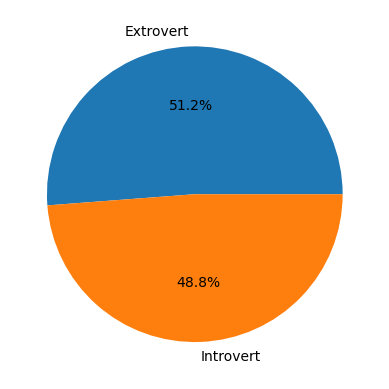

In [82]:
plt.pie(x= y_test.Personality.value_counts(), labels= y_test.Personality.value_counts().index, autopct='%0.1f%%')
plt.show()

# 7. Modelamiento de datos 

In [83]:
# Regresion logistica
#Predice las probabilidades de pertenecer a alguna 
#Algoritmo que optimiza el coste saga se usa ya que soporta penalizaciones de datos grandes l1, l2 y elasticnet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
modelo_1 = LogisticRegression(solver= 'saga', random_state=123)
param_grid = {'penalty':['l1', 'l2', 'elasticnet'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(estimator=modelo_1, param_grid= param_grid, cv=5, scoring='f1_weighted') #f1 estimar correctamente, mezcla dos metricas (f1_weighted)
clf_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_weighted')

In [84]:
#Crea un df donde cada fila corresponde a combinaciones de hiperparametros para ver que configuracion es mejor 
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns= ['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

,C,penalty,f1
1,0.0001,l2,0.934463
4,0.0010,l2,0.934463
7,0.0100,l2,0.934463
6,0.0100,l1,0.934463
9,0.1000,l1,0.934463
10,0.1000,l2,0.934463
13,1.0000,l2,0.934463
12,1.0000,l1,0.934463
18,100.0000,l1,0.934463
19,100.0000,l2,0.934463


In [85]:
#Selecciona el mejor estimador o combinacion de hiperparametros encontrada 
modelo_1_final = clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=0.0001, random_state=123, solver='saga')

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.94      1045
   Introvert       0.92      0.95      0.93       984

    accuracy                           0.93      2029
   macro avg       0.93      0.93      0.93      2029
weighted avg       0.93      0.93      0.93      2029



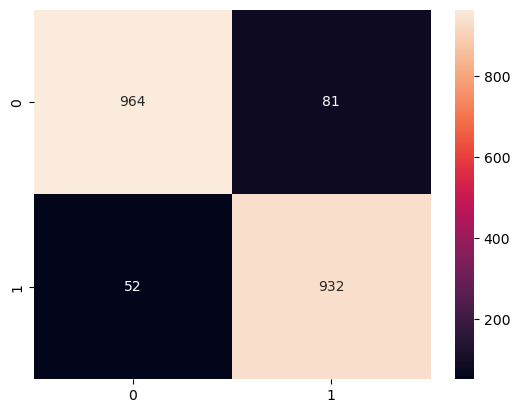

In [86]:
#matriz de confusion
from sklearn.metrics import confusion_matrix, classification_report
y_pred_1_train = modelo_1_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(y_train, y_pred_1_train), annot= True, fmt='d')
plt.show()

Metricas de Desempeño en Validación
              precision    recall  f1-score   support

   Extrovert       0.94      0.93      0.94       446
   Introvert       0.93      0.94      0.93       425

    accuracy                           0.93       871
   macro avg       0.93      0.93      0.93       871
weighted avg       0.93      0.93      0.93       871



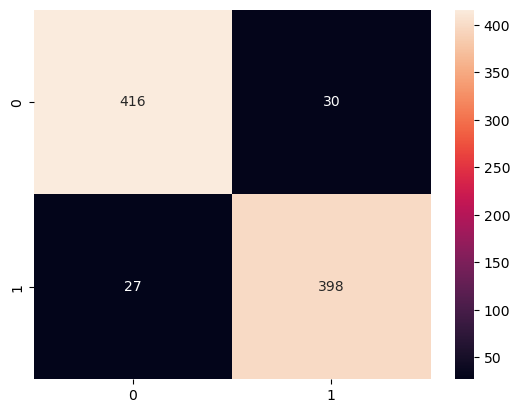

In [87]:
y_pred_1_test = modelo_1_final.predict(X_test)
print('Metricas de Desempeño en Validación')
print(classification_report(y_test, y_pred_1_test))
sb.heatmap(confusion_matrix(y_test, y_pred_1_test), annot= True, fmt='d')
plt.show()

In [ ]:
# k vecinos mas cercanos
from sklearn.neighbors import KNeighborsClassifier #inicia clasificador knn sin parametros 
modelo_2 = KNeighborsClassifier() #clasifica como nuevo punto basandose en los k vecinos cerca en el espacio
param_grid = {'n_neighbors': [3,5,7,19,21,53], 'p':[1,2]} #1 manhanttan 2 Euclidiana
clf_2 = GridSearchCV(estimator=modelo_2, param_grid= param_grid, cv=5, scoring='f1_weighted')
clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]},
             scoring='f1_weighted')

In [ ]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']), #busqueda de validación cruzada 
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns= ['f1'])], axis=1)
validation.sort_values('f1', ascending=False)
#mejor resultado f1 con 0.93 con vecinos igual a 21 , 19 y 53 y usa manhattan (valores bajos de menor rendimiento )

,n_neighbors,p,f1
8,21,1,0.934463
9,21,2,0.934463
6,19,1,0.934463
7,19,2,0.934463
10,53,1,0.934463
11,53,2,0.934463
5,7,2,0.932989
4,7,1,0.931509
3,5,2,0.925599
2,5,1,0.925599


In [ ]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final #entrena el modelo y guarda los resultados de cada combinación

KNeighborsClassifier(n_neighbors=19, p=1)

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.94      1045
   Introvert       0.92      0.95      0.93       984

    accuracy                           0.93      2029
   macro avg       0.93      0.93      0.93      2029
weighted avg       0.93      0.93      0.93      2029



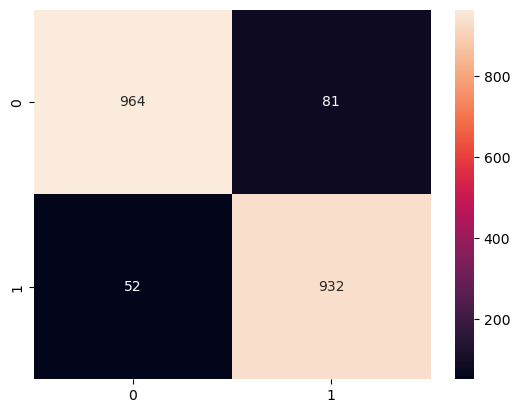

In [ ]:
y_pred_2_train = modelo_2_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_2_train))
sb.heatmap(confusion_matrix(y_train, y_pred_2_train), annot= True, fmt='d')
plt.show()
#Se ordenan las combinaciones de mayor a menor en funcion de f1 - (validación cruzada)
#extrov. precisión =0.94 eran correctos 
#recall=0.93 identificaron de los extro eran reales 
# f1 es el equilibrio de precisión y recall 



Metricas de Desempeño en Validación
              precision    recall  f1-score   support

   Extrovert       0.94      0.93      0.94       446
   Introvert       0.93      0.94      0.93       425

    accuracy                           0.93       871
   macro avg       0.93      0.93      0.93       871
weighted avg       0.93      0.93      0.93       871



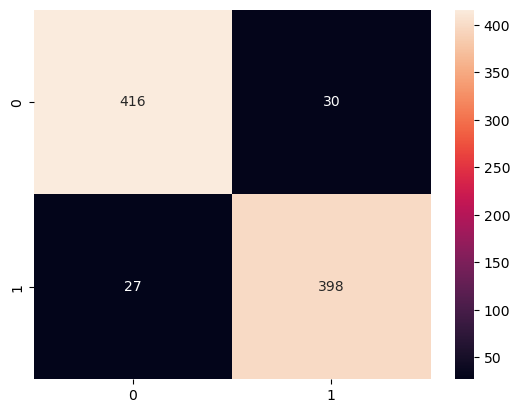

In [ ]:
y_pred_2_test = modelo_2_final.predict(X_test)
print('Metricas de Desempeño en Validación')
print(classification_report(y_test, y_pred_2_test))
sb.heatmap(confusion_matrix(y_test, y_pred_2_test), annot= True, fmt='d')
plt.show()
#en la matris se ve que 416 verdaderos positivos (extrovertidos bien clasificados)
#398 verdaderos positivos(intro bien clasificados )
#30 falsos negativos
# 27 falsos positivod 

In [93]:
#maquinas de sop vectorial
from sklearn.svm import SVC
modelo_3 = SVC(random_state=123)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4]}
clf_3 = GridSearchCV(estimator=modelo_3, param_grid= param_grid, cv=5, scoring='f1_weighted')
clf_3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=123),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_weighted')

In [94]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']),
                        pd.DataFrame(clf_3.cv_results_['mean_test_score'], columns= ['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

,C,degree,kernel,f1
5,0.0001,3,poly,0.934463
13,0.0010,2,poly,0.934463
14,0.0010,2,rbf,0.934463
9,0.0001,4,poly,0.934463
12,0.0010,2,linear,0.934463
...,...,...,...,...
3,0.0001,2,sigmoid,0.350169
1,0.0001,2,poly,0.350169
11,0.0001,4,sigmoid,0.350169
2,0.0001,2,rbf,0.350169


In [95]:
modelo_3_final = clf_3.best_estimator_
modelo_3_final

SVC(C=0.0001, kernel='poly', random_state=123)

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.94      1045
   Introvert       0.92      0.95      0.93       984

    accuracy                           0.93      2029
   macro avg       0.93      0.93      0.93      2029
weighted avg       0.93      0.93      0.93      2029



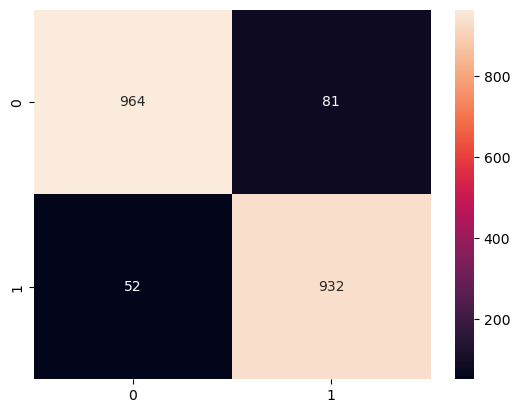

In [96]:
y_pred_3_train = modelo_3_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_3_train))
sb.heatmap(confusion_matrix(y_train, y_pred_3_train), annot= True, fmt='d')
plt.show()

Metricas de Desempeño de Validación
              precision    recall  f1-score   support

   Extrovert       0.94      0.93      0.94       446
   Introvert       0.93      0.94      0.93       425

    accuracy                           0.93       871
   macro avg       0.93      0.93      0.93       871
weighted avg       0.93      0.93      0.93       871



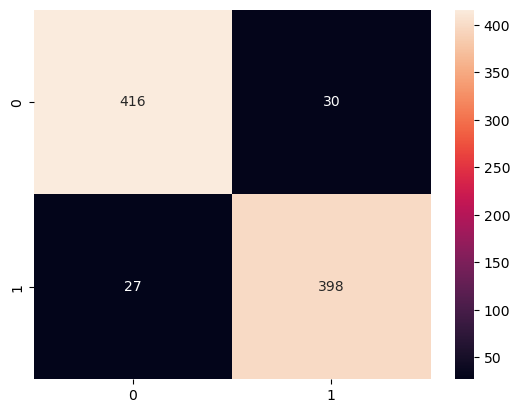

In [97]:
y_pred_3_test = modelo_3_final.predict(X_test)
print('Metricas de Desempeño de Validación')
print(classification_report(y_test, y_pred_3_test))
sb.heatmap(confusion_matrix(y_test, y_pred_3_test), annot= True, fmt='d')
plt.show()

In [98]:
#arbolito
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss', 'gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20], 'max_leaf_nodes': [None, 5, 10, 15, 20], 'min_samples_split': [2, 3, 4]}
clf_4 = GridSearchCV(estimator=modelo_4, param_grid= param_grid, cv=3, scoring='f1_weighted')
clf_4.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [99]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']),
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns= ['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
4,log_loss,NaN,5.0,3,0.934469
25,log_loss,5.0,15.0,3,0.934469
3,log_loss,NaN,5.0,2,0.934469
6,log_loss,NaN,10.0,2,0.934469
5,log_loss,NaN,5.0,4,0.934469
...,...,...,...,...,...
77,gini,NaN,NaN,4,0.879524
137,gini,20.0,NaN,4,0.879524
121,gini,15.0,NaN,3,0.873535
76,gini,NaN,NaN,3,0.872562


Profundidad del arbol: 3
Numero de hojas: 5


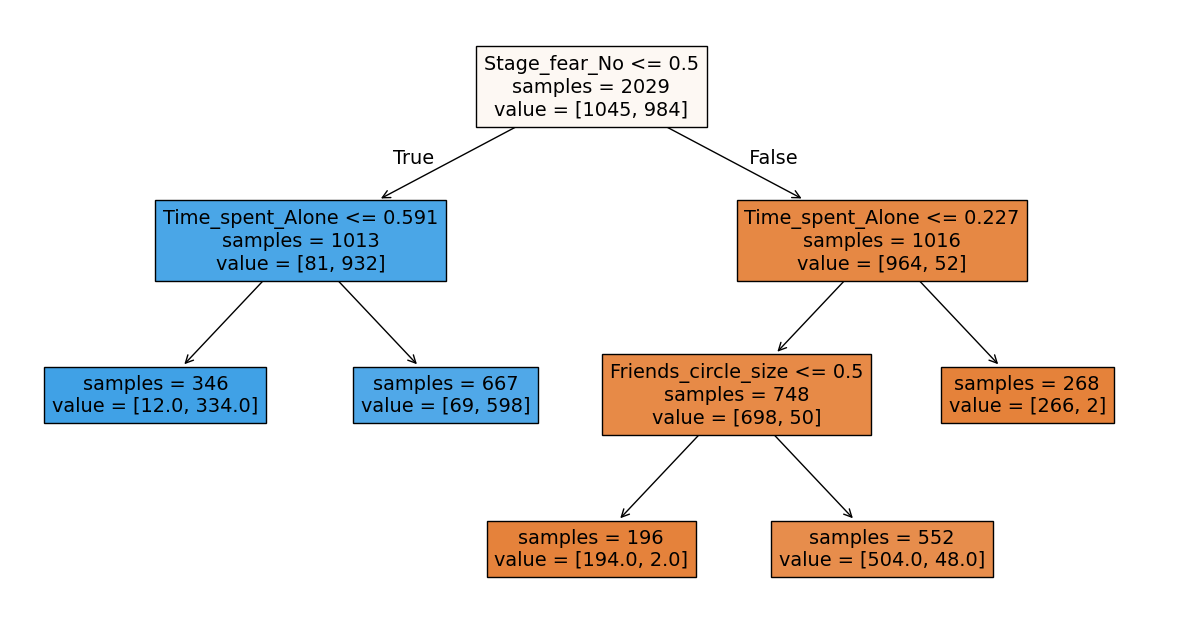

In [100]:
modelo_4_final = clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15, 8))
print(f'Profundidad del arbol: {modelo_4_final.get_depth()}\nNumero de hojas: {modelo_4_final.get_n_leaves()}')
plot = plot_tree(decision_tree=modelo_4_final, feature_names= labels, filled=True, impurity=False, ax=ax)

In [101]:
modelo_4_final = clf_4.best_estimator_
modelo_4_final

DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=5, random_state=123)

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.94      1045
   Introvert       0.92      0.95      0.93       984

    accuracy                           0.93      2029
   macro avg       0.93      0.93      0.93      2029
weighted avg       0.93      0.93      0.93      2029



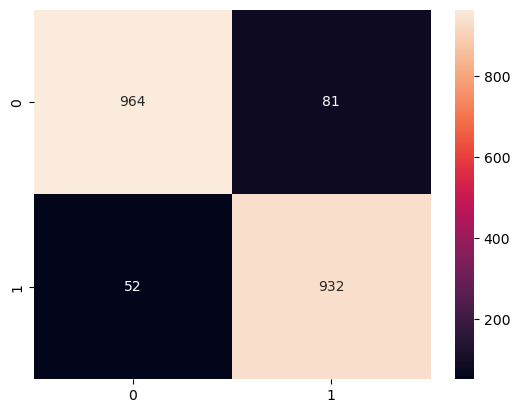

In [102]:
y_pred_4_train = modelo_4_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_4_train))
sb.heatmap(confusion_matrix(y_train, y_pred_4_train), annot= True, fmt='d')
plt.show()

Metricas de Desempeño de Validación
              precision    recall  f1-score   support

   Extrovert       0.94      0.93      0.94       446
   Introvert       0.93      0.94      0.93       425

    accuracy                           0.93       871
   macro avg       0.93      0.93      0.93       871
weighted avg       0.93      0.93      0.93       871



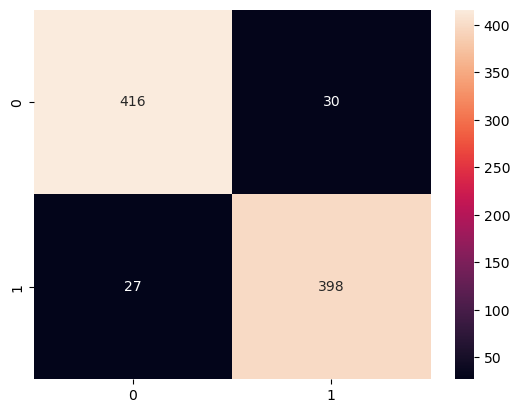

In [103]:
y_pred_4_test = modelo_4_final.predict(X_test)
print('Metricas de Desempeño de Validación')
print(classification_report(y_test, y_pred_4_test))
sb.heatmap(confusion_matrix(y_test, y_pred_4_test), annot= True, fmt='d')
plt.show()

Mejores hiperparámetros:
 {'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 2}
Profundidad del árbol: 5
Número de hojas: 25


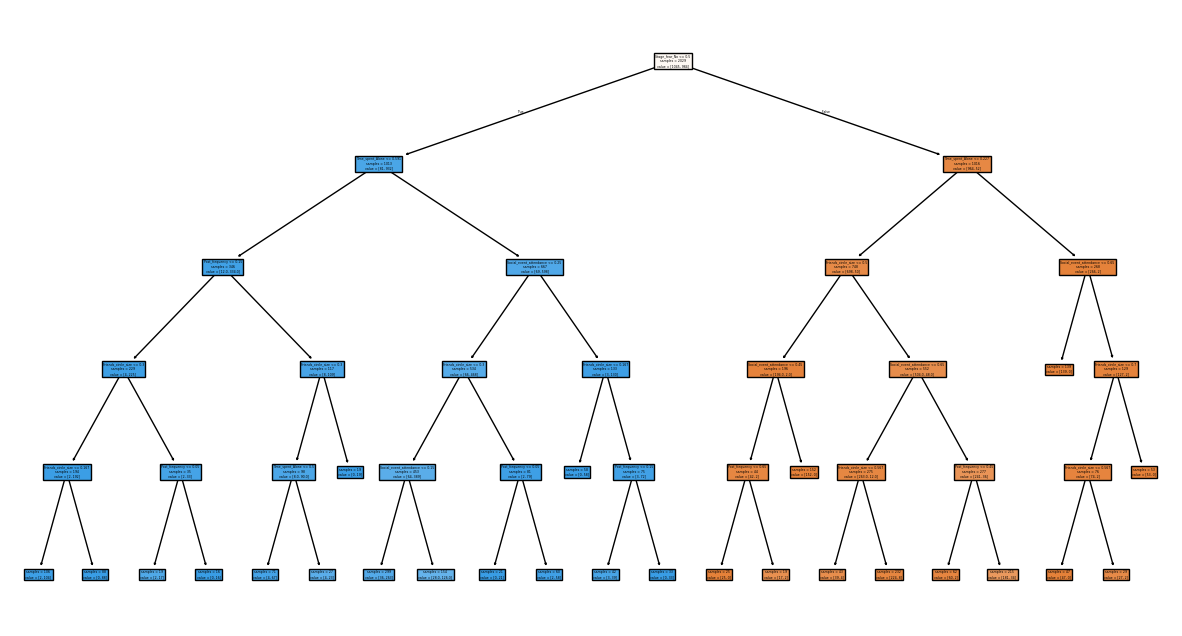

In [104]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

# Modelo base
modelo_5 = DecisionTreeClassifier(random_state=123)

# Definir grids separados para evitar NaN
param_grid = [
    {   # Solo max_depth
        'criterion': ['log_loss', 'gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 3, 4]
    },
    {   # Solo max_leaf_nodes
        'criterion': ['log_loss', 'gini', 'entropy'],
        'max_leaf_nodes': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 3, 4]
    },
    {   # Sin restricciones
        'criterion': ['log_loss', 'gini', 'entropy'],
        'min_samples_split': [2, 3, 4]
    }
]

# GridSearch
clf_4 = GridSearchCV(estimator=modelo_5, param_grid=param_grid, cv=3, scoring='f1_weighted')
clf_4.fit(X_train, y_train)

# Guardar resultados
validation = pd.concat([
    pd.DataFrame(clf_4.cv_results_['params']),
    pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])
], axis=1)

validation = validation.sort_values('f1', ascending=False)
print("Mejores hiperparámetros:\n", clf_4.best_params_)

# ===============================
# ÁRBOL FINAL
# ===============================
modelo_5_final = clf_4.best_estimator_

fig, ax = plt.subplots(figsize=(15, 8))

print(f'Profundidad del árbol: {modelo_5_final.get_depth()}')
print(f'Número de hojas: {modelo_5_final.get_n_leaves()}')

plot = plot_tree(
    decision_tree=modelo_5_final,
    feature_names=labels,  # asegúrate que labels es lista con nombres de features
    filled=True,
    impurity=False,
    ax=ax
)

plt.show()


In [105]:
modelo_5_final = clf_4.best_estimator_
modelo_5_final

DecisionTreeClassifier(criterion='log_loss', max_depth=5, random_state=123)

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.94      1045
   Introvert       0.92      0.95      0.93       984

    accuracy                           0.93      2029
   macro avg       0.93      0.93      0.93      2029
weighted avg       0.93      0.93      0.93      2029



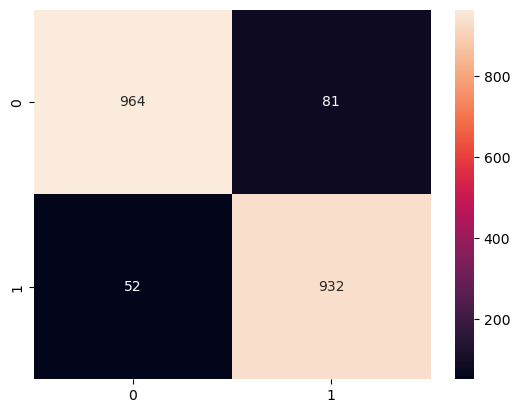

In [106]:
y_pred_5_train = modelo_5_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_5_train))
sb.heatmap(confusion_matrix(y_train, y_pred_5_train), annot= True, fmt='d')
plt.show()

Metricas de Desempeño de Validación
              precision    recall  f1-score   support

   Extrovert       0.94      0.93      0.94       446
   Introvert       0.93      0.94      0.93       425

    accuracy                           0.93       871
   macro avg       0.93      0.93      0.93       871
weighted avg       0.93      0.93      0.93       871



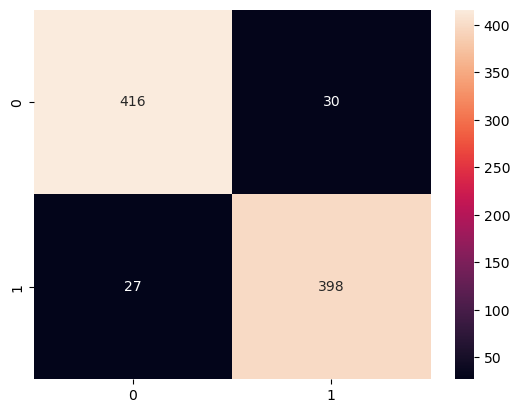

In [107]:
y_pred_5_test = modelo_5_final.predict(X_test)
print('Metricas de Desempeño de Validación')
print(classification_report(y_test, y_pred_5_test))
sb.heatmap(confusion_matrix(y_test, y_pred_5_test), annot= True, fmt='d')
plt.show()

# 9. 
## Conclusiones 

Todos los modelos han pasado la condición inicial del f1 score del 0.75 . Eso podría ser porque hay buen balance, buena cantidad de registros que nos facilitaron el trabajo.